## Jialin Shi  --  Breast Cancer Diagnosis

### Supervised Learning:
###### Method:
Normalize data.
Train an L1-penalized SVM to classify the data.    
Use 5 fold cv to choose the penalty parameter.    
Report  accuracy, precision, recall, F-score, and AUC, for test sets.

###### Monte Carlo Simulation     
        (test_accuray : 0.965   
         test_precision : 0.932    
         test_recall : 0.960    
         test_auc : 0.960    
         test_fscore : 0.963)    


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.metrics import confusion_matrix                         
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import hamming_loss
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import SpectralClustering

#### Load breast cancer data

In [2]:
# Benign=B-neg, Malignant=M-pos
df= pd.read_csv('wdbc.data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Use first 20% of the positive and the negative classes as the test

In [4]:
# split positive and negative
pos=df[df[1]=='M']
neg=df[df[1]=='B']
num1=int(len(pos)*0.2)
num2=int(len(neg)*0.2)
print(num1,num2)

42 71


In [5]:
# prepare test
pos_testx= pos.iloc[0:42,2:]
pos_testy=pos.iloc[0:42,1]
neg_testx= neg.iloc[0:71,2:]
neg_testy=neg.iloc[0:71,1]
# prepare train
pos_trainx= pos.iloc[42:,2:]
pos_trainy=pos.iloc[42:,1]
neg_trainx= neg.iloc[71:,2:]
neg_trainy=neg.iloc[71:,1]

In [6]:
#concat
testx=pd.concat([pos_testx,neg_testx])
testy=pd.concat([pos_testy,neg_testy])
trainx=pd.concat([pos_trainx,neg_trainx])
trainy=pd.concat([pos_trainy,neg_trainy])

# Normalize data
transformer = Normalizer().fit(trainx)
trainx=transformer.transform(trainx)
testx=transformer.transform(testx)

In [7]:
# Set the parameters by cross-validation
tuned_parameters = [{'tol': [1e1,1e0,1e-1,1e-2,1e-3,1e-4],
                     'C': [1, 10, 100, 1000,10000,100000]}]

#build model with cv and pick best parameter
LSVC=LinearSVC(penalty='l1',dual=False)

clf = GridSearchCV(LSVC, tuned_parameters, cv=5)
clf.fit(trainx, trainy)
print("Best parameters set for clf:")
print(clf.best_params_)
h=clf.best_params_
bestC=h['C']
tol0=h['tol']

Best parameters set for clf:
{'C': 10000, 'tol': 0.001}


In [8]:
# fit classifier
clf =LinearSVC(penalty='l1',dual=False,C=bestC,tol=tol0)
clf.fit(trainx, trainy)
pred=clf.predict(testx)
predt=clf.predict(trainx)
print("test-accuray :",1-hamming_loss(testy, pred))
print("train-accuray :",1-hamming_loss(trainy, predt))


test-accuray : 0.9557522123893806
train-accuray : 0.9890350877192983


In [9]:
# for test confusion matrix
print("for test:")
confusion_matrix(testy, pred)

for test:


array([[69,  2],
       [ 3, 39]])

In [10]:
# for train confusion matrix
pred0=clf.predict(trainx)
print("for train:")
confusion_matrix(trainy, pred0)

for train:


array([[285,   1],
       [  4, 166]])

In [11]:
# make label binary
testy2=testy.replace({'M':1,'B':-1})
pred=pd.DataFrame(pred)
pred2=pred.replace({'M':1,'B':-1})

trainy2=trainy.replace({'M':1,'B':-1})
pred0=pd.DataFrame(pred0)
pred3=pred0.replace({'M':1,'B':-1})

In [12]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(testy2, pred2)
average_precision0 = average_precision_score(trainy2, pred3)
print('test-precision:', average_precision)
print('train-precision:', average_precision0)

test-precision: 0.9098239338904135
train-precision: 0.9793953887889855


In [13]:
from sklearn.metrics import recall_score
print('test recall: ', recall_score(testy2, pred2, average='macro'))
print('train recall:',recall_score(trainy2, pred3, average='macro'))

test recall:  0.9502012072434608
train recall: 0.9864870423693952


In [14]:
from sklearn.metrics import f1_score
print('test f score: ', f1_score(testy2, pred2, average='macro'))
print('train f score: ', f1_score(trainy2, pred3, average='macro'))

test f score:  0.9523970005897716
train f score:  0.9882337762869307



for test auc:


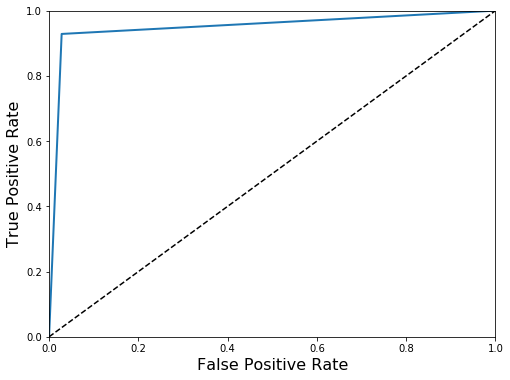

In [15]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testy2, pred2)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
print('\nfor test auc:')
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [16]:
# Area under curve
from sklearn.metrics import roc_auc_score
print('test auc:')
roc_auc_score(testy2, pred2)

test auc:


0.9502012072434608


 for train auc:


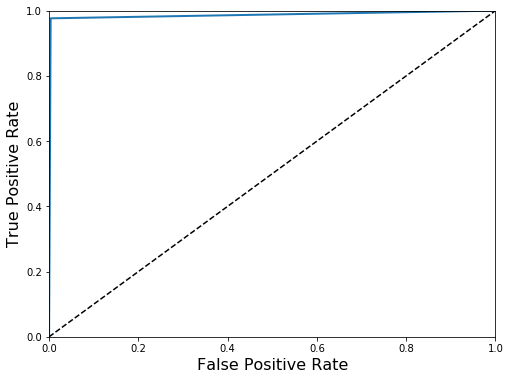

In [17]:
fpr, tpr, thresholds = roc_curve(trainy2, pred3)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
print('\n for train auc:')
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [18]:
# Area under curve
from sklearn.metrics import roc_auc_score
print('train auc:')
roc_auc_score(trainy2, pred3)

train auc:


0.9864870423693953

### monte carlo for supervised learning

In [19]:
df= pd.read_csv('wdbc.data.csv',header=None)
pos=df[df[1]=='M']
neg=df[df[1]=='B']
te_accuray=[]
tr_accuray=[]
te_precision=[]
tr_precision=[]
te_recall=[]
tr_recall=[]
te_roc=[]
tr_roc=[]
te_fscore=[]
tr_fscore=[]

tuned_parameters = [{'tol': [1e1,1e0,1e-1,1e-2,1e-3,1e-4],
                 'C': [1, 10, 100, 1000,10000,100000]}]

for m in range(30):
    print(m)
    #split data into train and test
    pos_train,pos_test=train_test_split(pos,test_size=0.2)
    pos_trainx=pos_train.iloc[:,2:]
    pos_trainy=pos_train.iloc[:,1]
    pos_testx=pos_test.iloc[:,2:]
    pos_testy=pos_test.iloc[:,1]
    
    neg_train,neg_test=train_test_split(neg,test_size=0.2)
    neg_trainx=neg_train.iloc[:,2:]
    neg_trainy=neg_train.iloc[:,1]
    neg_testx=neg_test.iloc[:,2:]
    neg_testy=neg_test.iloc[:,1]

    #concat
    testx=pd.concat([pos_testx,neg_testx])
    testy=pd.concat([pos_testy,neg_testy])
    trainx=pd.concat([pos_trainx,neg_trainx])
    trainy=pd.concat([pos_trainy,neg_trainy])
    
    # Normalize data
    transformer = Normalizer().fit(trainx)
    trainx=transformer.transform(trainx)
    testx=transformer.transform(testx)
    
    #build model
    LSVC=LinearSVC(penalty='l1',dual=False)
    clf = GridSearchCV(LSVC, tuned_parameters, cv=5)
    clf.fit(trainx, trainy)
    h=clf.best_params_
    bestC=h['C']
    tol0=h['tol']

    clf =LinearSVC(penalty='l1',dual=False,C=bestC,tol=tol0)
    clf.fit(trainx, trainy)
    pred=clf.predict(testx)
    predt=clf.predict(trainx)
    
    #accuracy
    test_accuray=1-hamming_loss(testy, pred)
    train_accuray=1-hamming_loss(trainy, predt)
    te_accuray.append(test_accuray)
    tr_accuray.append(train_accuray)

    # make it binary
    testy2=testy.replace({'M':1,'B':-1})
    pred=pd.DataFrame(pred)
    pred2=pred.replace({'M':1,'B':-1})

    trainy2=trainy.replace({'M':1,'B':-1})
    pred0=pd.DataFrame(predt)
    pred3=pred0.replace({'M':1,'B':-1})
    
    #precision
    average_precision = average_precision_score(testy2, pred2)
    average_precision0 = average_precision_score(trainy2, pred3)
    test_precision=average_precision
    train_precision=average_precision0
    te_precision.append(test_precision)
    tr_precision.append(train_precision)
    
    # recall
    test_recall=recall_score(testy2, pred2, average='macro')
    train_recall=recall_score(trainy2, pred3, average='macro')
    te_recall.append(test_recall)
    tr_recall.append(train_recall)
    
    # f score
    test_fscore=f1_score(testy2, pred2, average='macro')
    train_fscore=f1_score(trainy2, pred3, average='macro')
    te_fscore.append(test_fscore)
    tr_fscore.append(train_fscore)
    
    # auc
    a=roc_auc_score(trainy2, pred3)
    tr_roc.append(a)
    b=roc_auc_score(testy2, pred2)
    te_roc.append(b)
      

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [20]:
print('te_accuray :',np.mean(te_accuray))
print('tr_accuray :',np.mean(tr_accuray))
print('tr_precision :',np.mean(tr_precision))
print('te_precision :',np.mean(te_precision))
print('te_recall :',np.mean(te_recall))
print('tr_recall :',np.mean(tr_recall))
print('te_roc :',np.mean(te_roc))
print('tr_roc :',np.mean(tr_roc))
print('te_fscore :',np.mean(te_fscore))
print('tr_fscore :',np.mean(tr_fscore))

te_accuray : 0.965217391304348
tr_accuray : 0.9828928046989722
tr_precision : 0.9678837062679582
te_precision : 0.9317782080727336
te_recall : 0.9597329888027563
tr_recall : 0.9788681269248072
te_roc : 0.9597329888027563
tr_roc : 0.9788681269248072
te_fscore : 0.9625838257373707
tr_fscore : 0.9815825245083631
